In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1) 후보 폰트들(윈도우/맥/리눅스/코랩)
candidates = ["Malgun Gothic", "AppleGothic", "NanumGothic", "Noto Sans CJK KR", "Noto Sans KR"]

# 2) 설치된 폰트 목록
installed = [f.name for f in fm.fontManager.ttflist]

# 3) 사용 가능한 폰트 찾기
chosen = None
for font in candidates:
    if font in installed:
        chosen = font
        break

# 4) 폰트 적용
if chosen is not None:
    plt.rcParams["font.family"] = chosen
    plt.rcParams["axes.unicode_minus"] = False
    print("✅ 적용된 한글 폰트:", chosen)
else:
    print("❌ 한글 폰트를 못 찾음. (아래 2번 방법으로 폰트 설치/등록 필요)")


✅ 적용된 한글 폰트: Malgun Gothic


In [17]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('../general_churnscoreO_48540_826.csv')

C:\Users\82104\AppData\Local\Temp\ipykernel_25552\344996813.py:4: DtypeWarning: Columns (254) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../general_churnscoreO_48540_826.csv')


In [18]:
X = df[['Churn_Score']]

# KMeans 모델 생성 (군집 3개)
# random_state를 고정하면 돌릴 때마다 똑같은 결과가 나와서 좋아.
kmeans = KMeans(n_clusters=3, random_state=42)

# 학습 및 예측 (군집 번호 0, 1, 2 생성)
df['cluster_label'] = kmeans.fit_predict(X)

# 각 군집별로 데이터가 몇 개씩 들어갔는지 확인해볼까?
print("\n군집별 데이터 개수:")
print(df['cluster_label'].value_counts().sort_index())


군집별 데이터 개수:
cluster_label
0    11058
1    34926
2     2556
Name: count, dtype: int64


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1) 로드
df = pd.read_csv("../general_churnscoreO_48540_826.csv")

# 2) 클러스터링 (Churn_Score 1개 컬럼만)
X = df[["Churn_Score"]].copy()

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster_label"] = kmeans.fit_predict(X)

# 3) 분포 요약
counts = df["cluster_label"].value_counts().sort_index()
ratios = df["cluster_label"].value_counts(normalize=True).sort_index() * 100

summary = pd.DataFrame({"인원수(명)": counts, "비율(%)": ratios.round(2)})
print(summary)

# 4) 센터(중심점) 확인
centers = kmeans.cluster_centers_.flatten()
centers_sorted = np.sort(centers)
print("\n클러스터 중심점(Churn_Score):", centers)
print("정렬된 중심점:", centers_sorted)


C:\Users\82104\AppData\Local\Temp\ipykernel_25552\816198411.py:7: DtypeWarning: Columns (254) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../general_churnscoreO_48540_826.csv")


               인원수(명)  비율(%)
cluster_label               
0               11058  22.78
1               34926  71.95
2                2556   5.27

클러스터 중심점(Churn_Score): [ 8.21513836  1.24640096 20.99577465]
정렬된 중심점: [ 1.24640096  8.21513836 20.99577465]


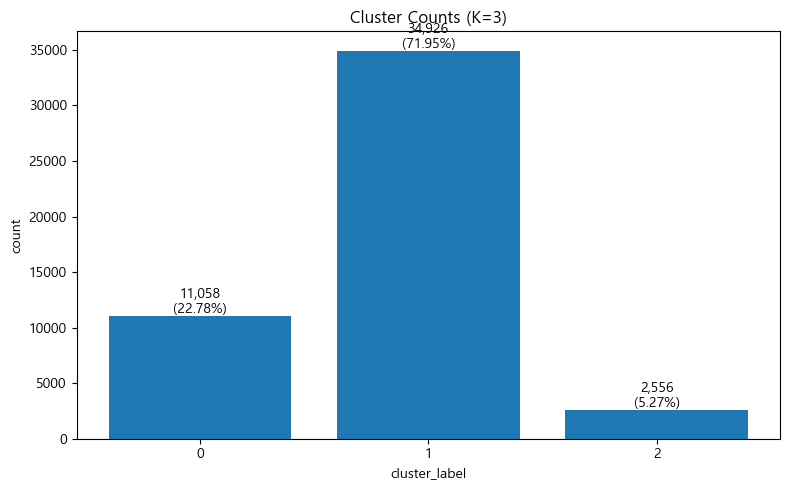

In [20]:
plt.figure(figsize=(8, 5))

x = counts.index.astype(int)
y = counts.values

plt.bar(x, y)

total = y.sum()
for i in range(len(x)):
    pct = (y[i] / total) * 100
    plt.text(x[i], y[i], f"{y[i]:,}\n({pct:.2f}%)", ha="center", va="bottom")

plt.title("Cluster Counts (K=3)")
plt.xlabel("cluster_label")
plt.ylabel("count")
plt.xticks(x)

plt.tight_layout()
plt.savefig("viz_01_cluster_counts_bar.png", dpi=200)
plt.show()


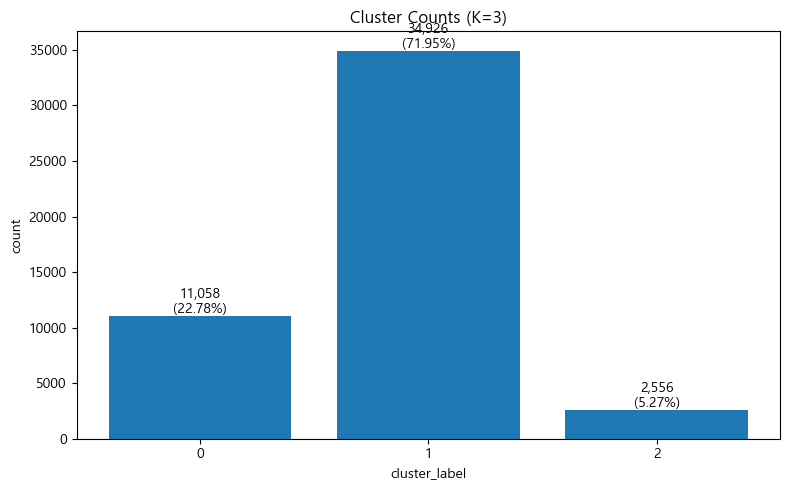

In [21]:
plt.figure(figsize=(8, 5))

x = counts.index.astype(int)
y = counts.values

plt.bar(x, y)

total = y.sum()
for i in range(len(x)):
    pct = (y[i] / total) * 100
    plt.text(x[i], y[i], f"{y[i]:,}\n({pct:.2f}%)", ha="center", va="bottom")

plt.title("Cluster Counts (K=3)")
plt.xlabel("cluster_label")
plt.ylabel("count")
plt.xticks(x)

plt.tight_layout()
plt.savefig("viz_01_cluster_counts_bar.png", dpi=200)
plt.show()


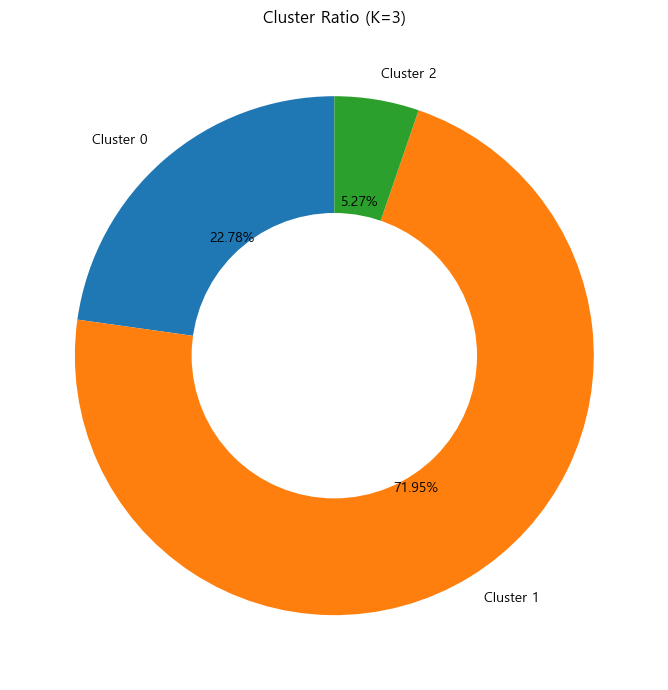

In [22]:
plt.figure(figsize=(7, 7))

labels = [f"Cluster {i}" for i in counts.index]
plt.pie(ratios.values, labels=labels, autopct="%1.2f%%", startangle=90)

# 도넛 만들기(가운데 원)
center_circle = plt.Circle((0, 0), 0.55, fc="white")
plt.gca().add_artist(center_circle)

plt.title("Cluster Ratio (K=3)")
plt.tight_layout()
plt.savefig("viz_02_cluster_ratio_donut.png", dpi=200)
plt.show()


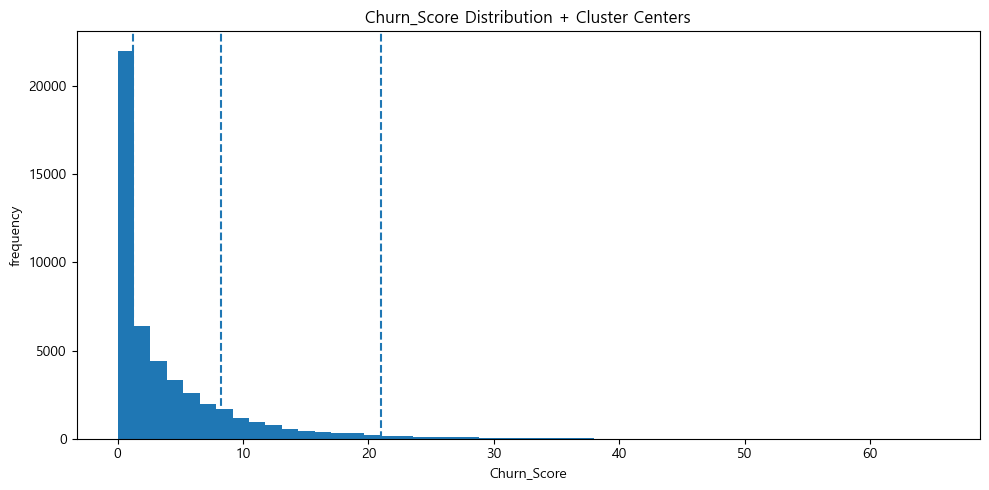

In [23]:
plt.figure(figsize=(10, 5))

scores = df["Churn_Score"].dropna().values
plt.hist(scores, bins=50)

# 중심선(정렬된 센터)
for c in centers_sorted:
    plt.axvline(c, linestyle="--")

plt.title("Churn_Score Distribution + Cluster Centers")
plt.xlabel("Churn_Score")
plt.ylabel("frequency")

plt.tight_layout()
plt.savefig("viz_03_hist_with_centers.png", dpi=200)
plt.show()


C:\Users\82104\AppData\Local\Temp\ipykernel_25552\1585017627.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1, data2], labels=["0", "1", "2"], showmeans=True)


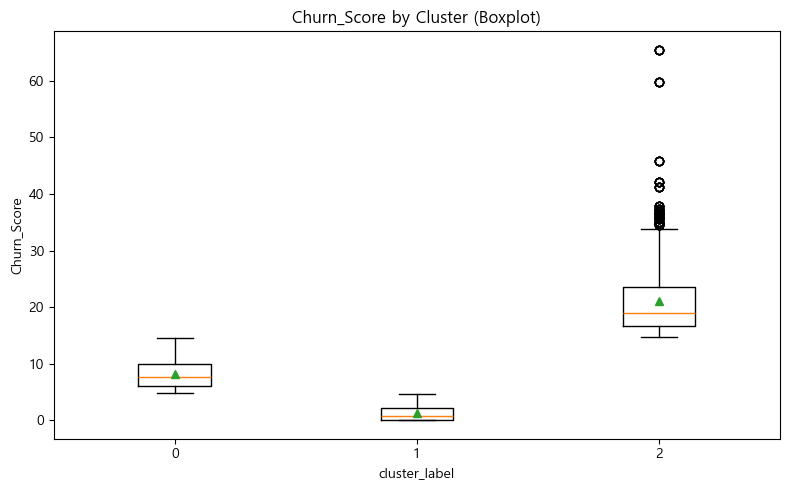

In [24]:
plt.figure(figsize=(8, 5))

data0 = df.loc[df["cluster_label"] == 0, "Churn_Score"].dropna().values
data1 = df.loc[df["cluster_label"] == 1, "Churn_Score"].dropna().values
data2 = df.loc[df["cluster_label"] == 2, "Churn_Score"].dropna().values

plt.boxplot([data0, data1, data2], labels=["0", "1", "2"], showmeans=True)

plt.title("Churn_Score by Cluster (Boxplot)")
plt.xlabel("cluster_label")
plt.ylabel("Churn_Score")

plt.tight_layout()
plt.savefig("viz_04_boxplot_by_cluster.png", dpi=200)
plt.show()


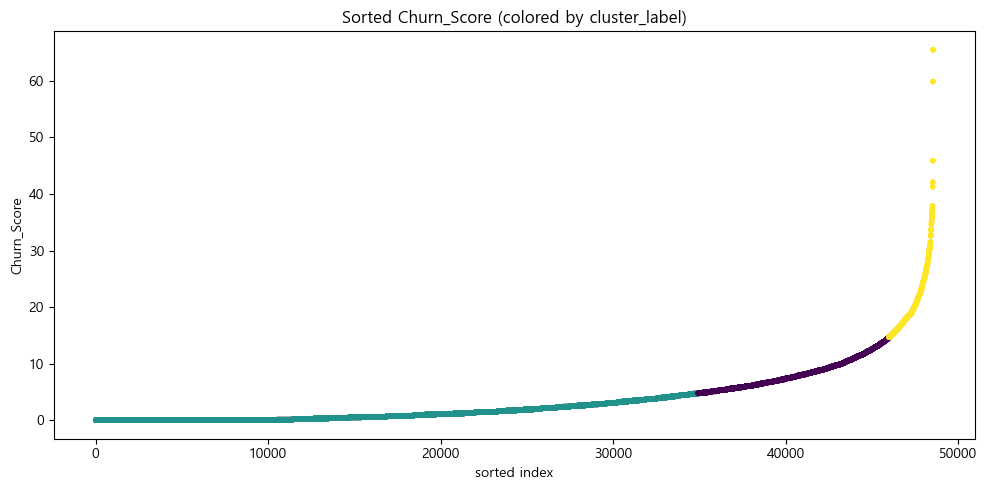

In [25]:
plt.figure(figsize=(10, 5))

df_plot = df[["Churn_Score", "cluster_label"]].dropna().copy()
df_plot = df_plot.sort_values("Churn_Score").reset_index(drop=True)

x = df_plot.index.values
y = df_plot["Churn_Score"].values
c = df_plot["cluster_label"].values

plt.scatter(x, y, c=c, s=8, alpha=0.6)

plt.title("Sorted Churn_Score (colored by cluster_label)")
plt.xlabel("sorted index")
plt.ylabel("Churn_Score")

plt.tight_layout()
plt.savefig("viz_05_sorted_scatter.png", dpi=200)
plt.show()


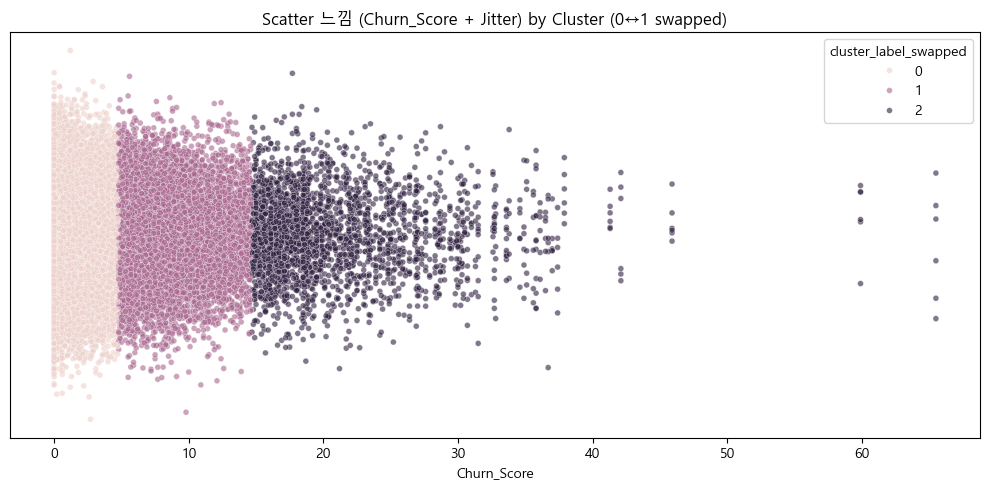

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[["Churn_Score"]].copy()
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster_label"] = kmeans.fit_predict(X)

# ✅ 여기 추가: 0과 1만 바꾸기(2는 그대로)
df["cluster_label_swapped"] = df["cluster_label"].replace({0: 1, 1: 0})

# y축에 아주 작은 흔들림 주기(점 겹침 방지)
np.random.seed(42)
df["y_jitter"] = np.random.normal(loc=0, scale=0.03, size=len(df))

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x="Churn_Score",
    y="y_jitter",
    hue="cluster_label_swapped",   # ✅ 스왑된 라벨로 표시
    hue_order=[0, 1, 2],           # ✅ 범례 순서 고정
    s=18,
    alpha=0.6
)

plt.title("Scatter 느낌 (Churn_Score + Jitter) by Cluster (0↔1 swapped)")
plt.xlabel("Churn_Score")
plt.ylabel("")
plt.yticks([])

plt.tight_layout()
plt.savefig("viz_scatter_jitter_by_cluster_swapped01.png", dpi=200)
plt.show()


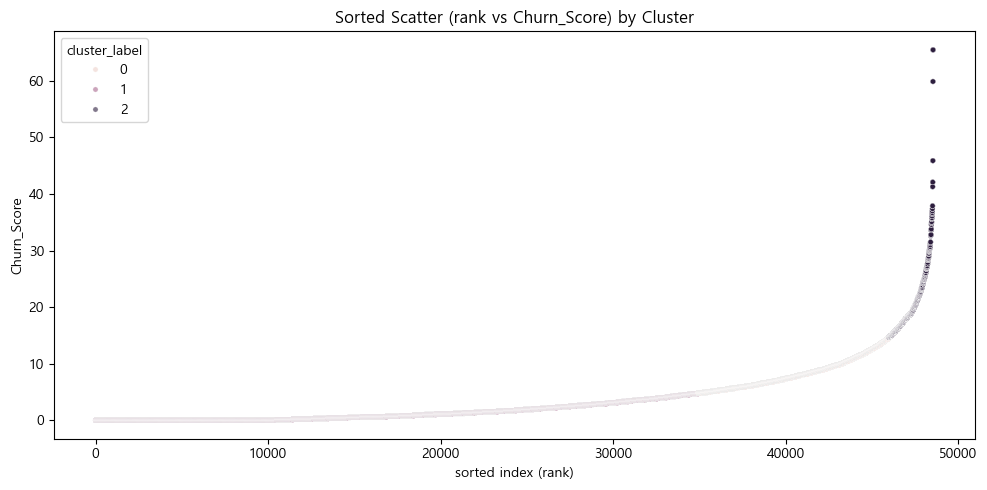

In [27]:
df_sorted = df[["Churn_Score", "cluster_label"]].dropna().sort_values("Churn_Score").reset_index(drop=True)
df_sorted["rank"] = df_sorted.index

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_sorted, x="rank", y="Churn_Score", hue="cluster_label", s=14, alpha=0.6)

plt.title("Sorted Scatter (rank vs Churn_Score) by Cluster")
plt.xlabel("sorted index (rank)")
plt.ylabel("Churn_Score")

plt.tight_layout()
plt.savefig("viz_sorted_scatter_by_cluster.png", dpi=200)
plt.show()


In [28]:
# cluster_label -> risk012로 재매핑 (점수 높은 군집 = 0 고위험)
mean_score = df.groupby("cluster_label")["Churn_Score"].mean().sort_values(ascending=False)
order = mean_score.index.tolist()

mapping = {order[0]: 0, order[1]: 1, order[2]: 2}
df["cluster_risk012"] = df["cluster_label"].map(mapping)

print("\n[재매핑 후 분포]")
print(df["cluster_risk012"].value_counts().sort_index())



[재매핑 후 분포]
cluster_risk012
0     2556
1    11058
2    34926
Name: count, dtype: int64


In [29]:
# Target 변수 생성 함수 정의
def create_target(label):
    if label == 0:
        return 1  # 이탈 (군집 0)
    else:
        return 0  # 잔존 (군집 1, 2)

# apply 함수를 써서 Target 컬럼 만들기
df['Target'] = df['cluster_label'].apply(create_target)

# 잘 만들어졌는지 결과 확인!
print("\n생성된 Target 변수 분포:")
print(df['Target'].value_counts())

# 최종 데이터 확인
display(df[['Churn_Score', 'cluster_label', 'Target']].head(10))


생성된 Target 변수 분포:
Target
0    37482
1    11058
Name: count, dtype: int64


,Churn_Score,cluster_label,Target
0,4.8,0,1
1,3.0,1,0
2,0.0,1,0
3,0.7,1,0
4,0.3,1,0
5,12.9,0,1
6,0.0,1,0
7,5.8,0,1
8,0.0,1,0
9,2.7,1,0


In [30]:
import numpy as np

# 1. 랜덤하게 2,000개 뽑기 (df는 이미 있다고 가정)
sampled_df = df.sample(n=2000, random_state=42)

# 2. '발급회원번호' 리스트 추출
id_list = sampled_df['발급회원번호'].tolist()

# 3. 텍스트 파일(member_ids.txt)로 저장하기
with open('member_ids.txt', 'w') as f:
    for member_id in id_list:
        f.write(f"{member_id}\n")

print(f"텍스트 파일 저장 완료! (총 {len(id_list)}개)")
print("첫 5개 ID 미리보기:", id_list[:5])

텍스트 파일 저장 완료! (총 2000개)
첫 5개 ID 미리보기: ['SYN_7533', 'SYN_5504', 'SYN_6505', 'SYN_5803', 'SYN_3285']


In [ ]:
import xgboost as xgb
import shap
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- [1. 데이터 준비] ---
# 분석에 불필요한 컬럼 제거 (ID, 날짜, 타겟, 군집 등)
cols_to_drop = ['발급회원번호', '기준년월', 'Target', 'cluster_label', 'Churn_Score']
# 실제 데이터프레임에 있는 컬럼만 골라서 드롭 (에러 방지)
drop_cols = [c for c in cols_to_drop if c in sampled_df.columns]

X = sampled_df.drop(columns=drop_cols)
X = X.select_dtypes(include=[np.number]) # 숫자형 데이터만 선택
y = sampled_df['Target']

# --- [2. XGBoost 모델 학습] ---
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X, y)
print("XGBoost 모델 학습 완료!")

# --- [3. SHAP 중요도(Mean |SHAP|) 계산] ---
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# 각 변수별 평균 절대값(Mean Absolute SHAP) 계산 -> 변수 중요도
shap_importance = np.abs(shap_values).mean(axis=0)

# --- [4. VIF 지수 계산] ---
# 결측치는 평균으로 채워서 계산 (VIF 오류 방지)
X_vif = X.fillna(X.mean())

# 모든 컬럼의 VIF 계산
vif_list = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# --- [5. 데이터프레임 통합 및 정렬] ---
result_df = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': shap_importance,
    'vif': vif_list
})

# SHAP 중요도 기준으로 내림차순 정렬
result_df = result_df.sort_values(by='shap_importance', ascending=False)

# --- [6. CSV 파일 저장] ---
filename = 'feature_importance_shap_vif.csv'
result_df.to_csv(filename, index=False)

print(f"\n[완료] '{filename}' 파일이 생성되었습니다!")
print(f"총 {len(result_df)}개의 변수가 저장되었습니다.")
print("\n[상위 5개 변수 미리보기]")
display(result_df.head())

c:\Users\82104\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\82104\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:29:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost 모델 학습 완료!


In [ ]:
import pandas as pd

# 1. 방금 만든 전체 변수 중요도 파일 불러오기
# (파일 이름이 다르다면 맞춰서 수정해줘!)
df = pd.read_csv('1cha_GENERAL_shap_vif.csv')

# 2. 상위 74개 행만 자르기 (인덱스 0 ~ 73)
top58_df = df.head(58)
# 또는 df.iloc[:74] 도 같은 결과야!

# 3. 새로운 CSV 파일로 저장
filename = 'feature_importance_top58.csv'
top58_df.to_csv(filename, index=False)

print(f"[완료] '{filename}' 파일이 생성되었습니다!")
print(f"추출된 변수 개수: {len(top58_df)}개")

# 확인 차 상위 5개와 마지막 5개(70~74위) 출력
print("\n[상위 5개]")
display(top58_df.head())
print("\n[하위 5개 (70~74위)]")
display(top58_df.tail())

[완료] 'feature_importance_top58.csv' 파일이 생성되었습니다!
추출된 변수 개수: 58개

[상위 5개]


,feature,shap_importance,vif
0,Slope_Spend,3.087630,3.791910
1,Slope_Count,2.119180,3.354801
2,Slope_Balance,0.904343,5.473045
3,평잔_3M,0.088512,146.725290
4,잔액_신판ca평균한도소진율_r3m,0.077044,721.242680



[하위 5개 (70~74위)]


,feature,shap_importance,vif
53,정상청구원금_B5M,0.010774,inf
54,이용건수_신판_R12M,0.010580,inf
55,잔액_일시불_B1M,0.010541,88.454039
56,이용개월수_신판_R12M,0.010038,405.164726
57,불만제기후경과월_R12M,0.009783,2.393359
